## Redes Neurais Artificiais 2020.1

**Disciplina**: Redes Neurais Artificiais 2020.1  
**Professora**: Elloá B. Guedes (ebgcosta@uea.edu.br)<br/>
**Github**: http://github.com/elloa  
  - Dayvson dos Santos Silva<br/>
    **Email**: ddss.snf19@uea.edu.br<br/>
    **GitHub**: https://github.com/userddssilva<br/>
  - Hiago Oliveira de Jesus<br/>
    **Email**: hodj.lic@uea.edu.br<br/>
    **GitHub**: https://github.com/HiagoOliver<br/>        

Levando em conta a base de dados **_Forest Cover Type_**, esta terceira parte do Projeto Prático 3 diz respeito à proposição e avaliação de múltiplas redes neurais artificiais do tipo feedforward multilayer perceptron para o problema da classificação multi-classe da cobertura florestal em uma área do Roosevelt National Forest.

## Testando Redes Neurais sem os Atributos Categórios

1. Abra a base de dados em questão
2. Elimine todas as colunas relativas aos atributos categóricos
3. Armazene o atributo alvo em uma variável y e os atributos preditores em uma variável X
4. Efetue uma partição holdout 70/30 com o sklearn, distribuindo os exemplos de maneira aleatória
5. Efetue o escalonamento dos atributos


### Escalonando os atributos

O treinamento de uma rede neural artificial é mais eficiente quando os valores que lhes são fornecidos como entrada são pequenos, pois isto favorece a convergência. Isto é feito escalonando-se todos os atributos para o intervalo [0,1], mas precisa ser feito de maneira cautelosa, para que informações do conjunto de teste não sejam fornecidas no treinamento.

Há duas estratégias para tal escalonamento: normalização e padronização. Ambas possuem características particulares, vantagens e limitações, como é possível ver aqui: https://www.analyticsvidhya.com/blog/2020/04/feature-scaling-machine-learning-normalization-standardization/


No nosso caso, vamos usar a padronização. Assim, com os atributos preditores do treinamento, isto é, X_train, deve-se subtrair a média e dividir pelo desvio padrão:

X_train_std = (X_train - np.mean(X_train))/np.std(X_train)

Em seguida, o mesmo deve ser feito com os atributos preditores do conjunto de testes, mas com padronização relativa ao conjunto de treinamento:

X_test_std = (X_test - np.mean(X_train))/np.std(X_train)

Se todo o conjunto X for utilizado na padronização, a rede neural receberá informações do conjunto de teste por meio da média e variância utilizada para preparar os dados de treinamento, o que não é desejável.

### Continuando

6. Treine uma rede neural multilayer perceptron para este problema com uma única camada e dez neurônios  
    6.1 Utilize a função de ativação ReLU  
    6.2 Utilize o solver Adam    
    6.3 Imprima o passo a passo do treinamento    
    6.4 Utilize o número máximo de épocas igual a 300  
7. Com o modelo em questão, após o treinamento, apresente:  
    7.1 Matriz de confusão para o conjunto de teste  
    7.2 Acurácia  
    7.3 F-Score  
    7.4 Precisão  
    7.5 Revocação  
8. Repita o treinamento da mesma rede anterior sem imprimir o passo a passo (verbose False) por 100 vezes  
    8.1 Cada uma destas repetições deve ser feita com uma nova partição Holdout  
    8.2 Apresente a média e o desvio padrão da acurácia e do F-Score para o conjunto de treino  
9. Repita por 100 vezes o treinamento desta mesma rede, mas utilizando o otimizador SGD  
    9.1 Apresente a média e o desvio padrão da acurácia e do F-Score para o conjunto de treino  
10. Houve influência da escolha do otimizador no desempenho da rede?

### Importando as bibliotecas

In [1]:
import re
import warnings
import random

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from joblib import dump

from math import sqrt

from prettytable import PrettyTable

from sklearn.model_selection import train_test_split

from sklearn.neural_network import MLPClassifier

from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import classification_report

warnings.filterwarnings('ignore')

## Testando Redes Neurais sem os Atributos Categórios


### 1. Abra a base de dados em questão

- Leitura da base de dados

In [2]:
#filePath = 'covtype.csv'
filePath = '../database/covtype.csv'
#filePath = '../input/forest-cover-type/covtype.csv'
full_database = pd.read_csv(filePath)
full_database

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581007,2396,153,20,85,17,108,240,237,118,837,...,0,0,0,0,0,0,0,0,0,3
581008,2391,152,19,67,12,95,240,237,119,845,...,0,0,0,0,0,0,0,0,0,3
581009,2386,159,17,60,7,90,236,241,130,854,...,0,0,0,0,0,0,0,0,0,3
581010,2384,170,15,60,5,90,230,245,143,864,...,0,0,0,0,0,0,0,0,0,3


### 2. Elimine todas as colunas relativas aos atributos categóricos

- Colunas da base de dados anterior a eliminação dos atributos categóricos

In [5]:
full_database.columns.to_list()

['Elevation',
 'Aspect',
 'Slope',
 'Horizontal_Distance_To_Hydrology',
 'Vertical_Distance_To_Hydrology',
 'Horizontal_Distance_To_Roadways',
 'Hillshade_9am',
 'Hillshade_Noon',
 'Hillshade_3pm',
 'Horizontal_Distance_To_Fire_Points',
 'Wilderness_Area1',
 'Wilderness_Area2',
 'Wilderness_Area3',
 'Wilderness_Area4',
 'Soil_Type1',
 'Soil_Type2',
 'Soil_Type3',
 'Soil_Type4',
 'Soil_Type5',
 'Soil_Type6',
 'Soil_Type7',
 'Soil_Type8',
 'Soil_Type9',
 'Soil_Type10',
 'Soil_Type11',
 'Soil_Type12',
 'Soil_Type13',
 'Soil_Type14',
 'Soil_Type15',
 'Soil_Type16',
 'Soil_Type17',
 'Soil_Type18',
 'Soil_Type19',
 'Soil_Type20',
 'Soil_Type21',
 'Soil_Type22',
 'Soil_Type23',
 'Soil_Type24',
 'Soil_Type25',
 'Soil_Type26',
 'Soil_Type27',
 'Soil_Type28',
 'Soil_Type29',
 'Soil_Type30',
 'Soil_Type31',
 'Soil_Type32',
 'Soil_Type33',
 'Soil_Type34',
 'Soil_Type35',
 'Soil_Type36',
 'Soil_Type37',
 'Soil_Type38',
 'Soil_Type39',
 'Soil_Type40',
 'Cover_Type']

- Os nomes das colunas que representam valores categóricos possuem como substring "Wilderness_Area" ou "Soil_Type". As expressões regulares foram utilizadas para seleção das colunas a serem eliminadas.

In [6]:
columns_to_drop = []
for column in list(full_database.columns):
    column_search = re.search('Soil_Type|Wilderness_Area', column)
    if column_search:
        columns_to_drop.append(column)
database = full_database.drop(columns=columns_to_drop, axis=1)

- Colunas da base de dados posterior a eliminação dos atributos categóricos

In [7]:
database.columns.to_list()

['Elevation',
 'Aspect',
 'Slope',
 'Horizontal_Distance_To_Hydrology',
 'Vertical_Distance_To_Hydrology',
 'Horizontal_Distance_To_Roadways',
 'Hillshade_9am',
 'Hillshade_Noon',
 'Hillshade_3pm',
 'Horizontal_Distance_To_Fire_Points',
 'Cover_Type']

### 3. Armazene o atributo alvo em uma variável y e os atributos preditores em uma variável X

- Alocando o atributo alvo na variável y

In [8]:
y = database.Cover_Type
y

0         5
1         5
2         2
3         2
4         5
         ..
581007    3
581008    3
581009    3
581010    3
581011    3
Name: Cover_Type, Length: 581012, dtype: int64

- Alocando os atributos preditores na variável X

In [9]:
X = database.iloc[:, :-1]
X

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points
0,2596,51,3,258,0,510,221,232,148,6279
1,2590,56,2,212,-6,390,220,235,151,6225
2,2804,139,9,268,65,3180,234,238,135,6121
3,2785,155,18,242,118,3090,238,238,122,6211
4,2595,45,2,153,-1,391,220,234,150,6172
...,...,...,...,...,...,...,...,...,...,...
581007,2396,153,20,85,17,108,240,237,118,837
581008,2391,152,19,67,12,95,240,237,119,845
581009,2386,159,17,60,7,90,236,241,130,854
581010,2384,170,15,60,5,90,230,245,143,864


### 4. Efetue uma partição holdout 70/30 com o Sklearn, distribuindo os exemplos de maneira aleatória

- Particionando a base de dados em 70% para treinamento e 30% para teste

In [10]:
def split_train_test(X, y):
    return train_test_split(X, y, test_size=0.30, random_state=42, shuffle=True)

In [11]:
X_train, X_test, y_train, y_test = split_train_test(X, y)

- A base de dados contém 581012 instâncias, das quais 406708 instâncias representam 70% dos dados e 174304 instâncias caracterizam 30% dos dados.

In [12]:
X_train.shape, X_test.shape

((406708, 10), (174304, 10))

### 5. Efetue o escalonamento dos atributos

- Escalonando os atributos preditores do conjunto treinamento e teste

In [13]:
# escalonando os dados
def scaler(X_train, X_test):
    return ((X_train - X_train.mean()) / X_train.std(), (X_test - X_train.mean()) / X_train.std())

In [14]:
X_train_std, X_test_std = scaler(X_train, X_test)

### 6. Treine uma rede neural multilayer perceptron para este problema com uma única camada e dez neurônios

```
6.1 Utilize a função de ativação ReLU
6.2 Utilize o solver Adam
6.3 Imprima o passo a passo do treinamento    
6.4 Utilize o número máximo de épocas igual a 300 
6.3 Imprima o passo a passo do treinamento
```

In [13]:
# definindo a rede neural
net_classifier_1 = MLPClassifier(
    hidden_layer_sizes=(10,),
    activation='relu',
    solver='adam',
    verbose=True, 
    max_iter=300,
    n_iter_no_change=2
)

# treinando a rede neural
net_classifier_1.fit(X_train_std, y_train)

Iteration 1, loss = 0.88160797
Iteration 2, loss = 0.71050888
Iteration 3, loss = 0.68675055
Iteration 4, loss = 0.67724115
Iteration 5, loss = 0.67199492
Iteration 6, loss = 0.66864867
Iteration 7, loss = 0.66613581
Iteration 8, loss = 0.66397049
Iteration 9, loss = 0.66220836
Iteration 10, loss = 0.66070169
Iteration 11, loss = 0.65974180
Iteration 12, loss = 0.65909994
Iteration 13, loss = 0.65861165
Iteration 14, loss = 0.65826170
Iteration 15, loss = 0.65791521
Iteration 16, loss = 0.65749674
Iteration 17, loss = 0.65710792
Iteration 18, loss = 0.65678549
Iteration 19, loss = 0.65655933
Iteration 20, loss = 0.65624789
Iteration 21, loss = 0.65604120
Iteration 22, loss = 0.65581395
Iteration 23, loss = 0.65566581
Iteration 24, loss = 0.65547320
Iteration 25, loss = 0.65536145
Iteration 26, loss = 0.65523673
Iteration 27, loss = 0.65510949
Iteration 28, loss = 0.65496101
Iteration 29, loss = 0.65480259
Iteration 30, loss = 0.65468240
Iteration 31, loss = 0.65456600
Iteration 32, los

MLPClassifier(hidden_layer_sizes=(10,), max_iter=300, n_iter_no_change=3,
              verbose=True)

### 7. Com o modelo em questão, após o treinamento, apresente:
```
7.1 Matriz de confusão para o conjunto de teste  
7.2 Acurácia  
7.3 F-Score  
7.4 Precisão  
7.5 Revocação 
```

- Visualizando o gráfico da matriz de confusão do conjunto de teste

In [14]:
# usando a rede neural treinada com o conjunto de teste
y_pred = net_classifier_1.predict(X_test_std)

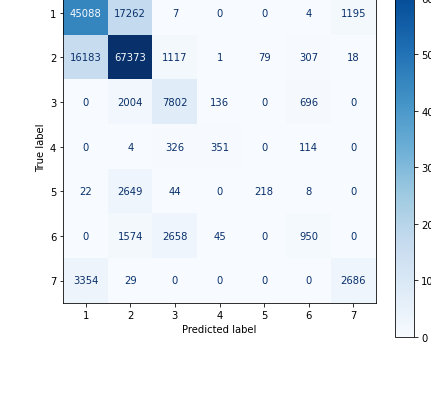

In [15]:
# plotando a matriz de confusão do teste
fig, ax = plt.subplots(figsize=(7,7))
plot_confusion_matrix(
    net_classifier_1, 
    X_test_std, y_test, 
    ax=ax,
    cmap='Blues', 
    values_format=""
)
plt.title('Matriz de Confusão')
plt.show()

- A **acurácia** do modelo de classificação no conjunto de teste:

In [16]:
accuracy_score(y_test, y_pred)

0.7140857352671195

- A seguir temos o valor da medida **F-score**:

In [17]:
f1_score(y_test, y_pred, average='macro')

0.5174344923081343

- A **precisão** tem valor:

In [18]:
precision_score(y_test, y_pred, average='macro')

0.6613891486463663

- O valor da **Revocação** é de:

In [19]:
recall_score(y_test, y_pred, average='macro')

0.48209807438378455

- O parâmetro average='macro', calcula a métrica para cada rótulo, retornando a média não ponderada das métricas.

- Em relação as demais métricas, a acurácia apresenta uma medida superior comparado as outras métricas.

### 8. Repita o treinamento da mesma rede anterior sem imprimir o passo a passo (verbose False) por 100 vezes

```
8.1 Cada uma destas repetições deve ser feita com uma nova partição Holdout  
8.2 Apresente a média e o desvio padrão da acurácia e do F-Score para o conjunto de treino 
```

In [21]:
# definindo uma strutura para salvar as metricas
# dos testes da rede neural
metricas = {'acuracias':[], 'fscores':[]}

# definindo as configurações da rede neural
nnc = MLPClassifier(
        hidden_layer_sizes=(10,), 
        activation='relu',
        solver='adam', 
        verbose=False, 
        max_iter=300, 
        shuffle=True, 
        n_iter_no_change=2
    )

# treinando e testando a rede neural por 100 vezes
# com diferentes conjunto de treinamento e testes
for i in range(100):
    
    # particionando o dataset
    X_train, X_test, y_train, y_test = split_train_test(X, y)

    # escalonando os dados
    X_train_std, X_test_std = scaler(X_train, X_test)

    # treinando as redes neurais
    nnc.fit(X_train_std, y_train)

    # testando a rede neural treinada
    y_pred = nnc.predict(X_test_std)
    
    # salvando os valores das metricas de cada treinamento
    metricas['acuracias'].append(accuracy_score(y_test, y_pred))
    metricas['fscores'].append(f1_score(y_test, y_pred, average='macro'))

- Média e desvio padrão das acurácias,  referentes aos resultados dos testes das redes neurais treinadas 100 vezes, utilizando o otimizador 'adam'

In [22]:
np.mean(metricas['acuracias']), np.std(metricas['acuracias'])

(0.7153789356526528, 0.003452432813294154)

- Média e desvio padrão dos F-scores,  referentes aos resultados dos testes das redes neurais treinadas 100 vezes, utilizando o otimizador 'adam'

In [23]:
np.mean(metricas['fscores']), np.std(metricas['fscores'])

(0.509132606915149, 0.017708386198457812)

- Visualizando os valores das métricas

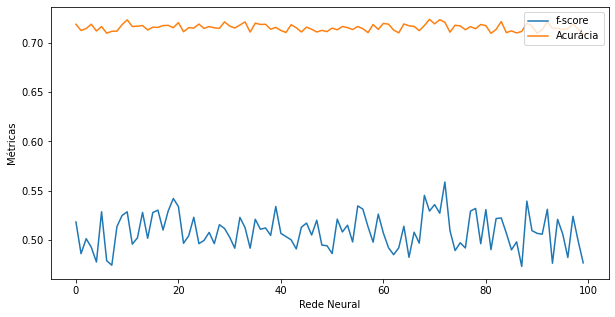

In [24]:
b = list(range(100))
plt.figure(figsize=(10,5))
plt.plot(b, metricas['fscores'], label='f-score')
plt.plot(b, metricas['acuracias'], label="Acurácia")
plt.xlabel('Rede Neural')
plt.ylabel('Métricas')
plt.legend(loc='upper right');

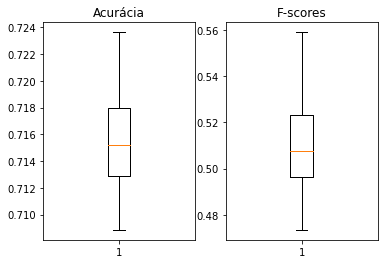

In [26]:
fig1, (ax1, ax2) = plt.subplots(1, 2)
ax1.set_title('Acurácia')
ax1.boxplot(metricas['acuracias'])
ax2.set_title("F-scores")
ax2.boxplot(metricas['fscores']);

### 9. Repita por 100 vezes o treinamento desta mesma rede, mas utilizando o otimizador SGD

```
9.1 Apresente a média e o desvio padrão da acurácia e do F-Score para o conjunto de treino 
```

In [27]:
# estrutura para salvar as metricas de teste
metricas = {'acuracias':[], 'fscores':[]}

# definindo a rede neural com o otimizador SGD
nnc = MLPClassifier(
        hidden_layer_sizes=(10,),
        activation='relu',
        solver='sgd', 
        verbose=False,
        max_iter=300, 
        shuffle=True,
        n_iter_no_change=2
    )

# executando a rede neural por 100 vezes
for i in range(100):
    
    # particionando o dataset
    X_train, X_test, y_train, y_test = split_train_test(X, y)

    # escalonando os dados
    X_train_std, X_test_std = scaler(X_train, X_test)

    # treinando as redes neurais
    nnc.fit(X_train_std, y_train)

    # testando a rede neural treinada
    y_pred = nnc.predict(X_test_std)
    
    # salvando os valores das metricas
    metricas['acuracias'].append(accuracy_score(y_test, y_pred))
    metricas['fscores'].append(f1_score(y_test, y_pred, average='macro'))

- Média e desvio padrão das acurácias, referentes aos resultados dos testes das redes neurais treinadas 100 vezes, utilizando o otimizador 'sgd'

In [28]:
np.mean(metricas['acuracias']), np.std(metricas['acuracias'])

(0.7124374082063523, 0.0031021582425169838)

- Média e desvio padrão dos F-scores, referentes aos resultados dos testes das redes neurais treinadas 100 vezes, utilizando o otimizador 'sgd'

In [34]:
np.mean(metricas['fscores']), np.std(metricas['fscores'])

(0.4706567276156957, 0.019504263570964013)

- Visualizando os valores das métricas

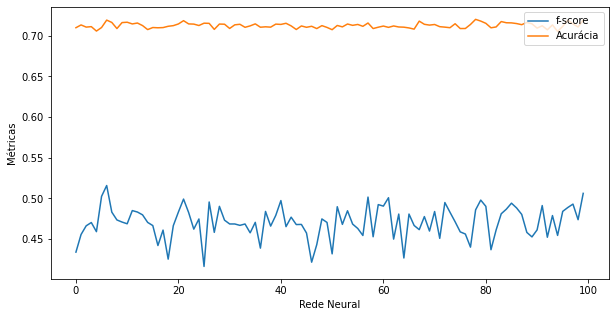

In [35]:
b = list(range(100))
plt.figure(figsize=(10,5))
plt.plot(b, metricas['fscores'], label='f-score')
plt.plot(b, metricas['acuracias'], label="Acurácia")
plt.xlabel('Rede Neural')
plt.ylabel('Métricas')
plt.legend(loc='upper right');

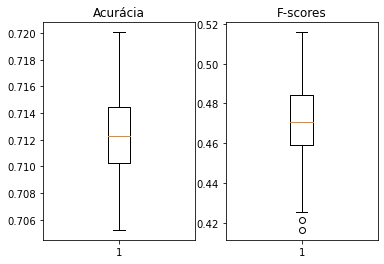

In [36]:
fig1, (ax1, ax2) = plt.subplots(1, 2)
ax1.set_title('Acurácia')
ax1.boxplot(metricas['acuracias'])
ax2.set_title("F-scores")
ax2.boxplot(metricas['fscores']);

#### 10. Houve influência da escolha do otimizador no desempenho da rede?

Tendo em vista uma comparação do desempenho da rede utilizando diferentes hiperparâmetros. Realizou-se dois experimentos com 100 treinamentos, com conjuntos treino diferentes, em cada um, o primeiro treinamento utilizou o otimizador 'adam' e o segundo o 'sgd'. Calculou-se a média e o desvio padrão da acurácia e F-Score dos dois experimentos. Os resultados obtidos demonstraram uma pequena vantagem de desempenho na rede que utilizou o otimizador 'adam'. Em relação a média das métricas de acurácia e f-score, as métricas d Ambos os treinamentos obtiveram uma média de acurácia bem parecidas. Diante disso, pode-se dizer que a escolha de um otimizador, influência no desempenho da rede.

## Discussão

Nos passos anteriores, você avaliou o desempenho de uma única rede neural que contém os seguintes parâmetros: uma única camada oculta com 10 neurônios e função de ativação ReLU. O otimizador utilizado, quer seja SGD ou ADAM, trata-se do algoritmo para aproximar o gradiente do erro. Neste sentido, **a escolha do otimizador é um hiperparâmetro**, pois diz respeito a como a rede neural definida previamente atuará "em tempo de execução"  durante o processo de treinamento. Também são hiperparâmetros a **quantidade de épocas**, a **taxa de aprendizado inicial**, dentre outros.

Cabe salientar também que você efetuou o treinamento desta rede por 100 vezes e apresentou os resultados em termos de média +- desvio padrão. Lembre-se que em uma rede neural há a inicialização aleatória de pesos e, em consequência, o desempenho delas está sujeito à uma flutuação estocástica. A execução destas múltiplas vezes faz com que eliminemos algum viés introduzido por uma boa ou má "sorte" na escolha de pesos no caso de uma única execução.

Você também aprendeu uma estratégia para escalonar os atributos para uma melhor convergência da rede. Utilize-a em todos os treinamentos e testes propostos a seguir.

## Propondo Novas Arquiteturas

Variando  os parâmetros (uma ou duas camadas ocultas, com diferente números de neurônios em cada uma delas e a função de ativação) e o hiperparâmetros solver (Adam ou SGD) e o número de épocas (100, 150 e 200), atenda ao que se pede:

1. Proponha 10 arquiteturas distintas de RNAs para o problema em questão, à sua escolha
2. Avalie cada uma das arquiteturas perante todos os hiperparâmetros apresentados por 100 vezes
3. Como resultado da avaliação, apresente:  
    3.1 Top-3 melhores redes no tocante à F-Score e Acurácia  
    3.2 Repetição em que houve o melhor desempenho de cada uma dessas redes: ilustre tp, tf, fp e fn

- Proponha 10 arquiteturas distintas de RNAs para o problema em questão, à sua escolha

In [37]:
# Mostrando os resultados dos parâmetros e hiperparâmetros escolhidos
def print_table(rows_of_table=[]):
    columns_of_table=[
        "Camadas",
        "Ativação",
        "Solver",
        "Épocas",
        "Neurônios",
        "Neurônios nas camadas"
    ]
    table = PrettyTable(columns_of_table)
    table.padding_width = 1
    for p in rows_of_table:
        table.add_row([
            len(p[0]),   # -> quantidade camadas
            p[3],        # -> ativação função
            p[1],        # -> sover
            p[2],        # -> épocas
            np.sum(p[0]),# -> quantidade neurônios
            p[0]         # -> neurônios camadas
        ])
    print(table)

In [39]:
# selecionando randomicamente os valores dos parâmetros
def random_choice_param(param_name, parameters):
    param_size = len(parameters[param_name])-1
    param_index = random.randint(0, param_size)
    param = parameters[param_name][param_index]
    return param

# esta função recebe como parâmetro uma quantidade 
# de arquiteturas desejadas e um dicionário com os
# possíveis valores das arquiteturas a serem geradas
# e retorna uma lista de arquiteturas
def generate_params(n_arch, parameters):        
    params = []
    arch = []
    while len(params) < n_arch:
        # escolhe os valores da arquitetura enquanto
        # eles não tenham sido escolhidos
        while (arch in params) or (len(arch) == 0):
            hid_la = random_choice_param("hidden_layers", parameters)
            sol = random_choice_param("solvers", parameters)
            ep = random_choice_param("epochs", parameters)
            act = random_choice_param("activation", parameters)
            arch = [hid_la, sol, ep, act]
        params.append(arch)
    return params

In [41]:
# Setando um dicionário com listas de parâmetros
# que serão selecionados randomicamente
parameters = {
    "hidden_layers": [(11,), (12,), (13,), (8, 3), (6, 7), (9, 10)],
    "solvers": ['adam', 'sgd'],
    "epochs": [100, 150, 200],
    "activation": ["identity", "logistic", "tanh", "relu"]
}

# chamando a função para gerar as redes
archs = generate_params(10, parameters)
print_table(archs)

+---------+----------+--------+--------+-----------+-----------------------+
| Camadas | Ativação | Solver | Épocas | Neurônios | Neurônios nas camadas |
+---------+----------+--------+--------+-----------+-----------------------+
|    1    |   tanh   |  adam  |  150   |     13    |         (13,)         |
|    2    |   tanh   |  adam  |  150   |     11    |         (8, 3)        |
|    2    |   tanh   |  sgd   |  150   |     13    |         (6, 7)        |
|    1    |   relu   |  adam  |  100   |     12    |         (12,)         |
|    2    | logistic |  sgd   |  200   |     13    |         (6, 7)        |
|    2    |   tanh   |  adam  |  200   |     19    |        (9, 10)        |
|    1    |   tanh   |  sgd   |  100   |     11    |         (11,)         |
|    1    | logistic |  sgd   |  100   |     12    |         (12,)         |
|    2    |   tanh   |  sgd   |  100   |     19    |        (9, 10)        |
|    1    | identity |  sgd   |  100   |     11    |         (11,)         |

- Avalie cada uma das arquiteturas perante todos os hiperparâmetros apresentados por 100 vezes

In [42]:
general_metrics_net = []

# percorrendo cada arquitetura gerada
for arch in archs:
    metrics = {'acuracias':[], 'fscores':[]}
    
    # criando a rede
    # arch <- [hidden_layer, solver, max_iter, activation]
    nnc = MLPClassifier(
        hidden_layer_sizes=arch[0],
        activation=arch[3],
        solver=arch[1],
        max_iter=arch[2],
        n_iter_no_change=3,
        verbose=False,
        shuffle=True
    )

    for i in range(5):

        # particionando o dataset
        X_train, X_test, y_train, y_test = split_train_test(X, y)

        # escalonando os dados
        X_train_std, X_test_std = scaler(X_train, X_test)

        # treinando a rede
        nnc.fit(X_train_std, y_train)

        # testando a rede neural treinada
        y_pred = nnc.predict(X_test_std)
        
        #calculando as metricas
        acuracia = accuracy_score(y_test, y_pred)
        fscore = f1_score(y_test, y_pred, average='macro')

        # salvando os valores das metricas
        metrics['acuracias'].append(acuracia)
        metrics['fscores'].append(fscore)

    general_metrics_net.append((
        np.mean(metrics['acuracias']),
        np.mean(metrics['fscores']),
        nnc
    ))

- Top-3 melhores redes no tocante à F-Score e Acurácia

In [43]:
# ordenando em ordem descendente o Top-3 pela métrica de acurácia
general_metrics_net.sort(key=lambda x: (x[0], x[1]), reverse=True)

In [44]:
table = PrettyTable(["Camadas","Ativação", "Solver", "Épocas", "Acurácia", "F-Score"])        
table.padding_width = 1

for i in range(3):
    rede = general_metrics_net[i][2]
    acuracia = np.round(general_metrics_net[i][0], 3)
    fscore = np.round(general_metrics_net[i][1], 3)

    table.add_row([
        rede.hidden_layer_sizes, 
        rede.activation, 
        rede.solver, 
        rede.max_iter, 
        acuracia,
        fscore
    ])
    
print(table)

+---------+----------+--------+--------+----------+---------+
| Camadas | Ativação | Solver | Épocas | Acurácia | F-Score |
+---------+----------+--------+--------+----------+---------+
| (9, 10) |   tanh   |  adam  |  200   |  0.734   |  0.529  |
|  (13,)  |   tanh   |  adam  |  150   |  0.728   |  0.542  |
| (9, 10) |   tanh   |  sgd   |  100   |  0.724   |  0.478  |
+---------+----------+--------+--------+----------+---------+


- Salvando as Top-3 arquiteturas redes

In [45]:
for i in range(3):
    dump(general_metrics_net[i][2], 'rede{0}.joblib'.format(i+1))

- Repetição em que houve o melhor desempenho de cada uma dessas redes: ilustre tp, tf, fp e fn

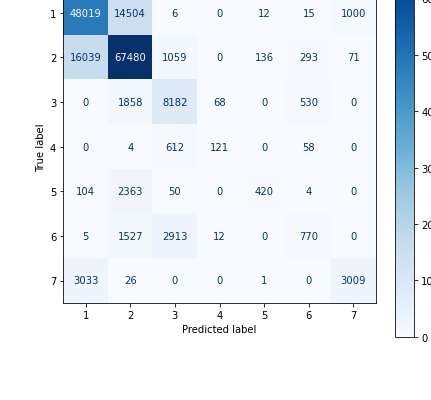

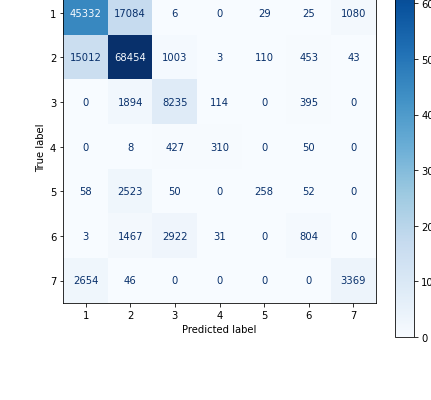

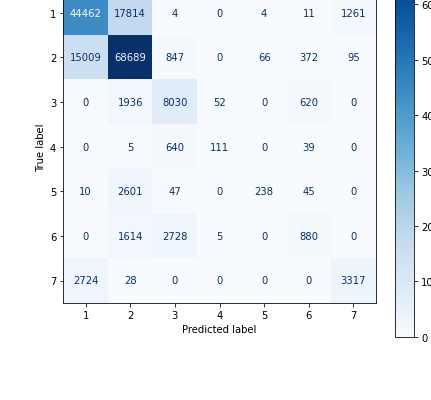

In [46]:
classificadores = [general_metrics_net[0][2],   # rede 1
                   general_metrics_net[1][2],   # rede 2
                   general_metrics_net[2][2]]   # rede 3

for classificador, label in zip(classificadores, ['Top-1', 'Top-2', 'Top-3']):
    fig, ax= plt.subplots(figsize=(7,7))
    plot_confusion_matrix(
        classificador,
        X_test_std,
        y_test, 
        ax=ax, 
        cmap='Blues', 
        values_format=""
    )
    plt.title('Matriz de Confusão ' + label)
plt.show()

## Estimando o número de neurônios

Um dos problemas de pesquisa com redes neurais artificiais consiste na determinação do número de neurônios em sua arquitetura. Embora não seja possível definir a priori qual rede neural é adequada para um problema, pois isto só é possível mediante uma busca exaustiva, há regras na literatura que sugerem o número de neurônios escondidos, tal como a regra da Pirâmide Geométrica, dada a seguir:

$$N_h = \alpha \cdot \sqrt{N_i \cdot N_o},$$

em que $N_h$ é o número de neurônios ocultos (a serem distribuídos em uma ou duas camadas ocultas), $N_i$ é o número de neurônios na camada de entrada e $N_o$ é o número de neurônios na camada de saída. 

1. Consulte a documentação da classe MLPClassifier (disponível em https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html) e obtenha os valores de $N_i$ e $N_h$.
2. Teste os valores de $\alpha$ como sendo iguais a $0.5$, $2$ e $3$.
3. Proponha pelo menos 30 redes neurais segundo a regra da pirâmide geométrica e teste-as nos mesmos termos estabelecidos anterioremente  (solver, épocas, etc.)  
    3.1 Apresente as top-3 melhores redes no tocante à F-Score e Acurácia

- Teste os valores de  α  como sendo iguais a  0.5 ,  2  e  3.

In [47]:
np.round((0.5 * sqrt(10 * 7), 2 * sqrt(10 * 7), 3 * sqrt(10 * 7)))

array([ 4., 17., 25.])

- Proponha pelo menos 30 redes neurais segundo a regra da pirâmide geométrica e teste-as nos mesmos termos estabelecidos anterioremente (solver, épocas, etc.)

In [48]:
parameters = {
    "hidden_layers": [(4,), (17,), (25,), (10,7), (10,15), (2,2), (13,4), (19,6)],
    "solvers": ['adam', 'sgd'],
    "epochs": [100, 150, 200],
    "activation": ["identity", "logistic", "tanh", "relu"]
}
archs = generate_params(30, parameters)
print_table(archs)

+---------+----------+--------+--------+-----------+-----------------------+
| Camadas | Ativação | Solver | Épocas | Neurônios | Neurônios nas camadas |
+---------+----------+--------+--------+-----------+-----------------------+
|    2    |   tanh   |  sgd   |  100   |     4     |         (2, 2)        |
|    2    | identity |  sgd   |  200   |     25    |        (10, 15)       |
|    2    |   relu   |  sgd   |  100   |     17    |        (13, 4)        |
|    2    | identity |  sgd   |  150   |     25    |        (10, 15)       |
|    2    |   relu   |  sgd   |  100   |     25    |        (10, 15)       |
|    1    | identity |  sgd   |  100   |     4     |          (4,)         |
|    1    | logistic |  adam  |  200   |     25    |         (25,)         |
|    2    |   relu   |  adam  |  150   |     25    |        (19, 6)        |
|    2    |   tanh   |  adam  |  200   |     17    |        (10, 7)        |
|    1    |   tanh   |  adam  |  200   |     4     |          (4,)         |

In [49]:
general_metrics_net_2 = []

for arch in archs:
    
    metrics = {'acuracias':[], 'fscores':[]}
    
    # criando a rede
    nnc = MLPClassifier(
        hidden_layer_sizes=arch[0], 
        activation=arch[3], 
        solver=arch[1], 
        max_iter=arch[2],
        n_iter_no_change=2, 
        verbose=False, 
        shuffle=True
    )

    for i in range(100):

        # particionando o dataset
        X_train, X_test, y_train, y_test = split_train_test(X, y)

        # escalonando os dados
        X_train_std, X_test_std = scaler(X_train, X_test)

        # treinando a rede
        nnc.fit(X_train_std, y_train)

        # testando a rede neural treinada
        y_pred = nnc.predict(X_test_std)
        
        #calculando as metricas
        acuracia = accuracy_score(y_test, y_pred)
        fscore = f1_score(y_test, y_pred, average='macro')

        # salvando os valores das metricas
        metrics['acuracias'].append(acuracia)
        metrics['fscores'].append(fscore)

    general_metrics_net_2.append((
        np.mean(metrics['acuracias']), 
        np.mean(metrics['fscores']), 
        nnc
    ))

- Apresente as top-3 melhores redes no tocante à F-Score e Acurácia

In [50]:
# ordenando em ordem descendente o Top-3 pela métrica de acurácia
general_metrics_net_2.sort(key=lambda x: (x[0], x[1]), reverse=True)

In [51]:
table = PrettyTable(["Camadas","Ativação", "Solver", "Épocas", "Acurácia", "F-Score"])        
table.padding_width = 1

for i in range(100):
    rede = general_metrics_net_2[i][2]
    acuracia = np.round(general_metrics_net_2[i][0], 3)
    fscore = np.round(general_metrics_net_2[i][1], 3)

    table.add_row([
        rede.hidden_layer_sizes, 
        rede.activation, 
        rede.solver, 
        rede.max_iter, 
        acuracia,
        fscore
    ])
    
print(table)

+---------+----------+--------+--------+----------+---------+
| Camadas | Ativação | Solver | Épocas | Acurácia | F-Score |
+---------+----------+--------+--------+----------+---------+
|  (25,)  | logistic |  adam  |  200   |  0.745   |  0.578  |
|  (25,)  | logistic |  adam  |  100   |  0.743   |  0.568  |
| (19, 6) |   tanh   |  sgd   |  150   |  0.742   |  0.516  |
+---------+----------+--------+--------+----------+---------+


In [52]:
# salvando os modelos treinados
for i in range(3):
    dump(general_metrics_net_2[i][2], 'rede{0}.joblib'.format(i+4))

## Testando as Redes Neurais com Atributos Categóricos

1. Considere as 6 redes neurais obtidas nos dois top-3 anteriores (arquiteturas próprias e regra da pirâmide geométrica)
2. Com todos os atributos preditores da base de dados original, incluindo os categóricos, treine e teste estas mesmas redes por 100 repetições  
    2.1 Considere o melhor otimizador para cada uma delas  
    2.2 Faça uso de 200 épocas para treinamento  
    2.2 Apresente os resultados de acurácia e F-Score em termos da média +- dp para cada arquitetura
3. Apresente o gráfico boxplot para o F-Score das 6 arquiteturas perante as 100 repetições

- Considere as 6 redes neurais obtidas nos dois top-3 anteriores (arquiteturas próprias e regra da pirâmide geométrica)

In [16]:
# definindo as 6 redes neurais
redes = [
    MLPClassifier(hidden_layer_sizes=(9,10), activation='tanh', solver='adam', max_iter=200, n_iter_no_change=3, verbose=False, shuffle=True),
    MLPClassifier(hidden_layer_sizes=(13,), activation='tanh', solver='adam', max_iter=150, n_iter_no_change=3, verbose=False, shuffle=True),
    MLPClassifier(hidden_layer_sizes=(9,10), activation='tanh', solver='sgd', max_iter=100, n_iter_no_change=3, verbose=False, shuffle=True),
    MLPClassifier(hidden_layer_sizes=(25,), activation='logistic', solver='adam', max_iter=200, n_iter_no_change=3, verbose=False, shuffle=True),
    MLPClassifier(hidden_layer_sizes=(25,), activation='logistic', solver='adam', max_iter=100, n_iter_no_change=3, verbose=False, shuffle=True),
    MLPClassifier(hidden_layer_sizes=(16,6), activation='tanh', solver='sgd', max_iter=150, n_iter_no_change=3, verbose=False, shuffle=True)
]

In [17]:
# mostrando as arquiteturas usadas no teste com atributos categóricos
table = PrettyTable(["Camadas","Ativação", "Solver", "Épocas"])        
table.padding_width = 1
for i in range(6):
    rede = redes[i]
    table.add_row([
        rede.hidden_layer_sizes, 
        rede.activation, 
        rede.solver, 
        rede.max_iter
    ])
print(table)

+---------+----------+--------+--------+
| Camadas | Ativação | Solver | Épocas |
+---------+----------+--------+--------+
| (9, 10) |   tanh   |  adam  |  200   |
|  (13,)  |   tanh   |  adam  |  150   |
| (9, 10) |   tanh   |  sgd   |  100   |
|  (25,)  | logistic |  adam  |  200   |
|  (25,)  | logistic |  adam  |  100   |
| (16, 6) |   tanh   |  sgd   |  150   |
+---------+----------+--------+--------+


- Com todos os atributos preditores da base de dados original, incluindo os categóricos, treine e teste estas mesmas redes por 100 repetições

In [18]:
X = full_database.iloc[:,:-1]
y = full_database.Cover_Type

- Considere o melhor otimizador para cada uma delas

In [19]:
# definindo o otimizador das redes
otimizador = 'sgd'
for i in range(6):
    redes[i].solver = otimizador

- Faça uso de 200 épocas para treinamento

In [20]:
# definindo o máximo de épocas das redes
epocas = 200
for i in range(6):
    redes[i].max_iter = epocas

In [22]:
acuracia = PrettyTable(["Arquitetura", "Média", "Desvio Padrão"])
fscore = PrettyTable(["Arquitetura", "Média", "Desvio Padrão"])
acuracia.padding_width = 1
fscore.padding_width = 1

boxplot = []
arquitetura = 1


for classifier in redes:
        
    medidas3 = {'acuracias':[], 'fscores':[]}

    for i in range(5):

        # particionando o dataset
        X_train, X_test, y_train, y_test = split_train_test(X, y)

        # escalonando os dados
        X_train_std, X_test_std = scaler(X_train, X_test)
        
        # treinando a rede
        classifier.fit(X_train_std, y_train)

        # testando a rede neural treinada
        y_pred = classifier.predict(X_test_std)
        
        # salvando os valores das metricas
        medidas3['acuracias'].append(accuracy_score(y_test, y_pred))
        medidas3['fscores'].append(f1_score(y_test, y_pred, average='macro'))
    
    acuracia.add_row([
        arquitetura,
        medidas3['acuracias'].mean(), 
        medidas3['acuracias'].std()
    ])
    
    fscore.add_row([
        arquitetura, 
        medidas3['fscores'].mean(),
        medidas3['fscores'].std()
    ])
        
    boxplot.append((
        arquitetura,
        medidas3['fscore']
    ))
        
    arquitetura +=1

MemoryError: Unable to allocate 168. MiB for an array with shape (54, 406708) and data type int64

- Apresente os resultados de acurácia e F-Score em termos da média +- dp para cada arquitetura

In [ ]:
print(acuracia)

In [ ]:
print(fscore)

- Apresente o gráfico boxplot para o F-Score das 6 arquiteturas perante as 100 repetições

In [ ]:
for i in range(len(boxplot)):
    fig, ax = plt.subplots()
    ax.set_title('Arquitetura '+i)
    ax.boxplot(boxplot[i])
    plt.show()

## Considerações Parciais

1. É possível identificar uma rede com desempenho superior às demais?
2. Qual estratégia mostrou-se mais producente para a obtenção de boas arquiteturas (Estratégia Própria ou Pirâmide Geométrica)? Por quê?
3. Considerar os atributos categóricos trouxe melhorias? Justifique.
4. Um número maior de épocas trouxe melhorias?
5. Qual a maior dificuldade de resolução do problema proposto perante as RNAs?